# Exercise 12.1

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

import statsmodels.api   as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression

## Preform analysis of the Cirrhosis_death_rate data

In [2]:
data_frame = pd.read_csv('data\Cirrhosis_death_rate.csv')

In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            46 non-null     int64  
 1   Late_births           46 non-null     float64
 2   Wine_consumption      46 non-null     int64  
 3   Liquor_consumption    46 non-null     int64  
 4   Cirrhosis_death_rate  46 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 1.9 KB


In [4]:
data_frame.head()

,Population,Late_births,Wine_consumption,Liquor_consumption,Cirrhosis_death_rate
0,44,33.2,5,30,41.2
1,43,33.8,4,41,31.7
2,48,40.6,3,38,39.4
3,52,39.2,7,48,57.5
4,71,45.5,11,53,74.8


In [5]:
data_frame.describe()

,Population,Late_births,Wine_consumption,Liquor_consumption,Cirrhosis_death_rate
count,46.000000,46.000000,46.000000,46.000000,46.000000
mean,56.260870,41.476087,11.586957,57.500000,63.493478
std,15.747218,7.044342,6.920424,22.140712,23.447979
min,27.000000,31.200000,2.000000,26.000000,28.000000
25%,44.250000,35.625000,6.250000,41.500000,48.900000
50%,55.000000,42.250000,10.000000,56.000000,57.650000
75%,65.000000,45.825000,15.750000,68.750000,75.700000
max,87.000000,56.100000,31.000000,149.000000,129.900000


<AxesSubplot:>

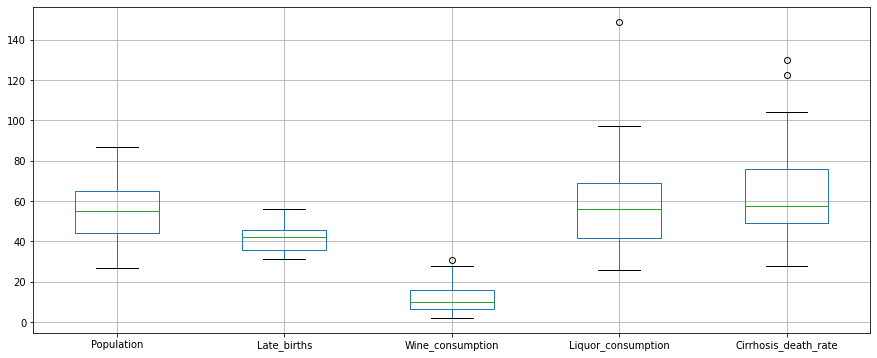

In [6]:
from matplotlib.pyplot import figure

figure(figsize=(15, 6))
data_frame.boxplot()

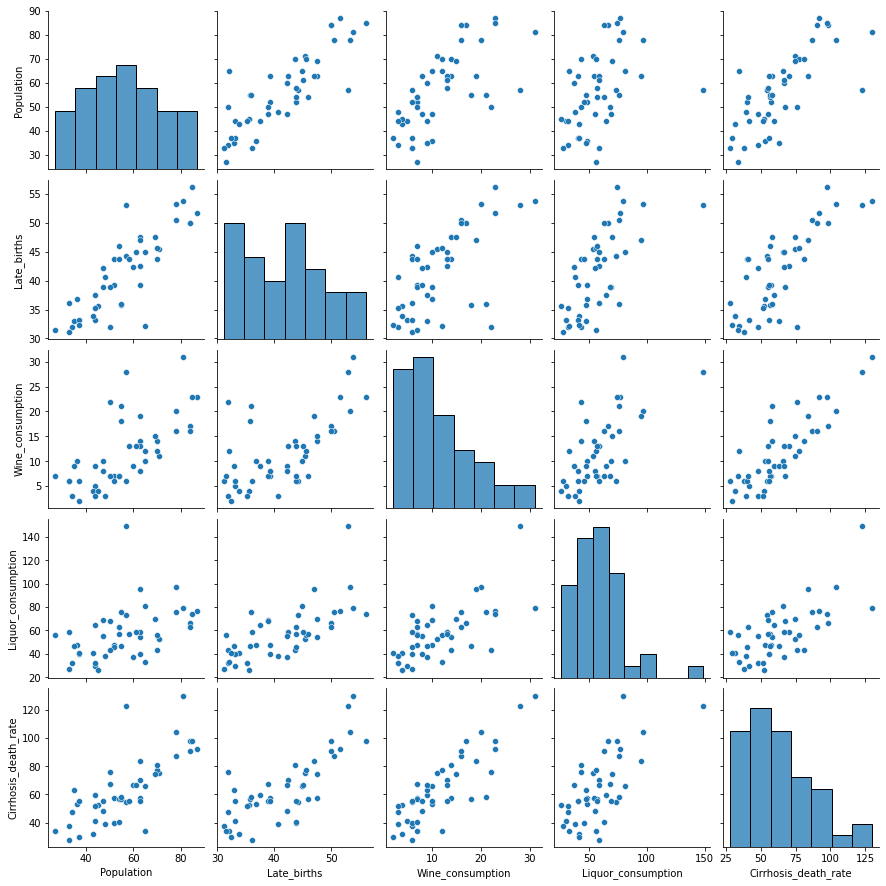

In [7]:
sns.pairplot(data_frame)

### *from the last row in pairplot it seems that all features have some linear correlation to the Cirrhosis_death_rate*

## Use Population for Cirrhosis_death_rate linear regression

In [8]:
# gather regression statistics for comparison

dictLogLikelihood = {}
dictAdjR_squared = {}

### Using sklearn LinearRegression

In [9]:
X = data_frame.Population.values.reshape(-1,1)
y = data_frame.Cirrhosis_death_rate.values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

1.1153888113958872
0.7407338284226839
The linear model is: Y = 0.74073 + 1.1154X


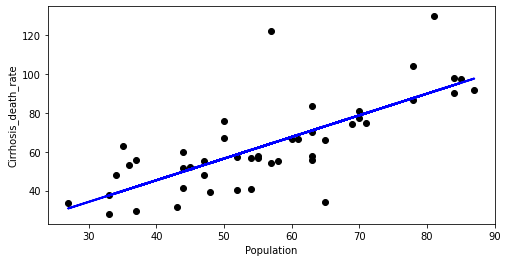

In [10]:
predictions = reg.predict(X)

plt.figure(figsize=(8, 4))
plt.scatter(
    data_frame.Population,
    data_frame.Cirrhosis_death_rate,
    c='black'
)
plt.plot(
    data_frame.Population,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Population")
plt.ylabel("Cirrhosis_death_rate")
plt.show()

### using seaborn regression

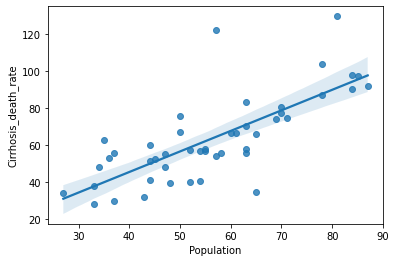

In [11]:
sns.regplot(x="Population", y="Cirrhosis_death_rate", data=data_frame);

In [12]:
oModel = smf.ols(
    formula='Cirrhosis_death_rate ~ Population', 
    data=data_frame).fit()
print(oModel.summary())

                             OLS Regression Results                             
Dep. Variable:     Cirrhosis_death_rate   R-squared:                       0.561
Model:                              OLS   Adj. R-squared:                  0.551
Method:                   Least Squares   F-statistic:                     56.25
Date:                  Sun, 10 Oct 2021   Prob (F-statistic):           2.13e-09
Time:                          15:15:10   Log-Likelihood:                -190.94
No. Observations:                    46   AIC:                             385.9
Df Residuals:                        44   BIC:                             389.5
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7407      8.681

In [13]:
dictLogLikelihood['Population'] = oModel.llf
dictAdjR_squared['Population']  = oModel.rsquared_adj

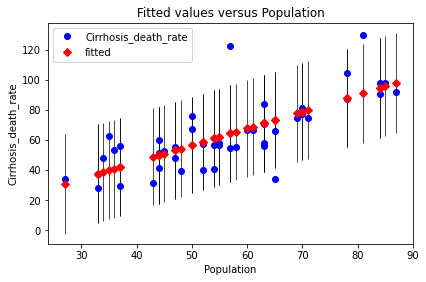

In [14]:
fig = sm.graphics.plot_fit(oModel, "Population")
fig.tight_layout(pad=1.0)

In [15]:
# Video 2 from https://icedrive.net/1/d3S4bGEtBN

# 1. Coef: coefficients of the linear regrssion (the same as in sklearn linear regression)
# 2. std err: those are the std of the coef, 
# 3. t: using the std err from section 2 we build the student t test for the H1 (big t -> small p_value)
# 4. p>|t: p_value, lower the p_value means the population is more significant in predicating the Cirrhosis_death_rate target
# 5. CI: the probability that the value is outside the range is 5% (e.g. Population [0.816, 1.415])
# 6. Log-Likelihood: compare between diffrent model regressions
# 7. Prob (F-statistic): the lower the value means that the all set of the features predicts well thr Cirrhosis_death_rate target

# since both 4 and 7 are extremely low we can reject H0

### Assumptions:

#### *We can predict the **Cirrhosis_death_rate** using the population*

#### *Or in hypothesis style:*
#### *H0: **Population** is linear correlated regression of the **Cirrhosis_death_rate** target (wi = 0)*
#### *H1: **Population** is significant predicting of the **Cirrhosis_death_rate** target (wi != 0)*

### Conclusions:

#### *There is a linear relation between **Population** and **Cirrhosis_death_rate** target*
#### *We can reject the H0 hypothesis (p_value 2.13e-09)*

## Use Population and Liquor_consumption for Cirrhosis_death_rate linear regression

In [16]:
oModel = smf.ols(
    formula='Cirrhosis_death_rate ~ Population + Liquor_consumption', 
    data=data_frame).fit()

print(oModel.summary())

                             OLS Regression Results                             
Dep. Variable:     Cirrhosis_death_rate   R-squared:                       0.715
Model:                              OLS   Adj. R-squared:                  0.702
Method:                   Least Squares   F-statistic:                     53.92
Date:                  Sun, 10 Oct 2021   Prob (F-statistic):           1.91e-12
Time:                          15:15:10   Log-Likelihood:                -181.02
No. Observations:                    46   AIC:                             368.0
Df Residuals:                        43   BIC:                             373.5
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

In [17]:
dictLogLikelihood['Population+Liquor_consumption'] = oModel.llf
dictAdjR_squared['Population+Liquor_consumption']  = oModel.rsquared_adj

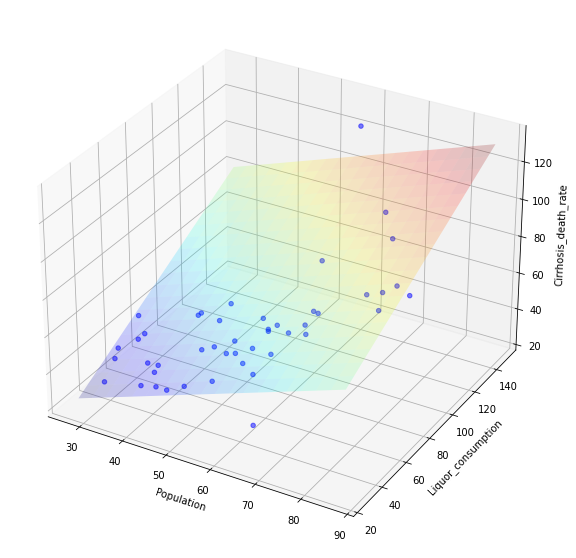

In [18]:
# plot the regression in 3d visualization

# https://medium.com/@dhwajraj/python-regression-analysis-part-4-multiple-linear-regression-ed09a0c31c74

x_surf, y_surf = np.meshgrid(
    np.linspace(
        data_frame.Population.min(),
        data_frame.Population.max(), 20),
    np.linspace(
        data_frame.Liquor_consumption.min(),
        data_frame.Liquor_consumption.max(), 20),
)    
onlyX = pd.DataFrame({'Population': x_surf.ravel(), 'Liquor_consumption': y_surf.ravel()})
fittedY=oModel.predict(exog=onlyX)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    data_frame['Population'],
    data_frame['Liquor_consumption'],
    data_frame['Cirrhosis_death_rate'],
    c='blue',
    marker='o',
    alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.values.reshape(x_surf.shape), alpha=0.2, cmap=plt.cm.jet, edgecolor='none')
ax.set_xlabel('Population')
ax.set_ylabel('Liquor_consumption')
ax.set_zlabel('Cirrhosis_death_rate')
plt.show()


### Assumptions:

### *We can predict the **Cirrhosis_death_rate** using the population and Liquor_consumption*

#### *Or in hypothesis style:*
#### *H0: Population and Liquor_consumption are not significant for estimating the Cirrhosis_death_rate target (wi=0)*
#### *H1: Population, Liquor_consumption are significant for estimating the Cirrhosis_death_rate target (wi!=0)*

### Conclusions:

#### *There is a linear relation between **Population**,**Liquor_consumption** and **Cirrhosis_death_rate** target*
#### *both features (Population and Liquor_consumption) are significant since the p_value of both of them is small*
#### *We can reject the H0 hypothesis (p_value 1.91e-12)*

In [19]:
# Since the Prob (F-statistic) is close to zero  2.13e-09 we can reject the null hypothesis (H0)
# In addition, 5 

# https://machinelearningmastery.com/feature-selection-for-regression-data/

eval_env: 1
eval_env: 1
eval_env: 1


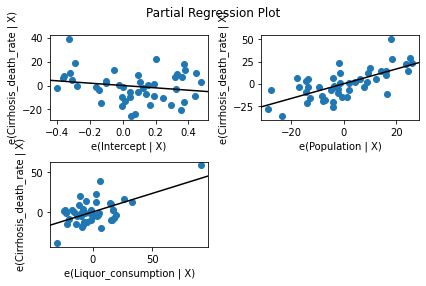

In [20]:
fig = sm.graphics.plot_partregress_grid(oModel)
fig.tight_layout(pad=1.0)

In [21]:
# 12.1: Use all the features to perform linear regression for Cirrhosis_death_rate 

features_cols  = data_frame.columns[:-1]
target_col = data_frame.columns[-1]

formula = target_col + ' ~ ' + (' + ').join(features_cols)

oModel = smf.ols(
    formula=formula, 
    data=data_frame).fit()

print(oModel.summary())

                             OLS Regression Results                             
Dep. Variable:     Cirrhosis_death_rate   R-squared:                       0.814
Model:                              OLS   Adj. R-squared:                  0.795
Method:                   Least Squares   F-statistic:                     44.75
Date:                  Sun, 10 Oct 2021   Prob (F-statistic):           1.95e-14
Time:                          15:15:11   Log-Likelihood:                -171.25
No. Observations:                    46   AIC:                             352.5
Df Residuals:                        41   BIC:                             361.6
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

In [22]:
dictLogLikelihood['All'] = oModel.llf
dictAdjR_squared['All']  = oModel.rsquared_adj

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


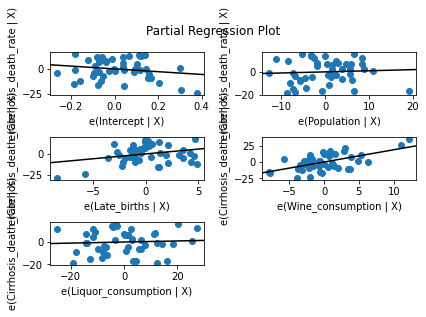

In [23]:
fig = sm.graphics.plot_partregress_grid(oModel)
fig.tight_layout(pad=1.0)

### Assumptions:

### *We can predict the **Cirrhosis_death_rate** using all the features*

#### *Or in hypothesis style:*
#### *H0: None of the features are significant for estimating the of the Cirrhosis_death_rate target (wi=0)*
#### *H1: At least one of the features is significant for estimating the Cirrhosis_death_rate target (wi!=0)*

### Conclusions:

#### *Since the Prob (F-statistic) is close to zero  2.13e-09) we can reject the null hypothesis (H0)*


#### *Also, we can see that the adjusted R squared kept increasing as we added more features.*

#### *The other features are significant by this order:*
#### *1. Wine_consumption  (0.000)*
#### *2. Late_births (0.056)*
#### *3. Population (0.689)*     
#### *4. Liquor_consumption (0.720)* 

In [24]:
oModel.pvalues.sort_values()

Wine_consumption      0.000036
Late_births           0.055644
Intercept             0.227643
Population            0.689259
Liquor_consumption    0.719793
dtype: float64

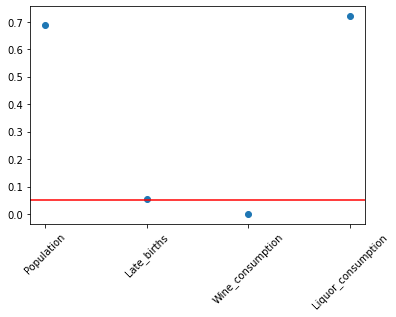

In [25]:
# Comparing the p_values in the all features multiple regression
plt.xticks(rotation=45)
plt.axhline(y=0.05, color='r', linestyle='-')
plt.scatter(features_cols, oModel.pvalues[1:])

## Comparing the regression models

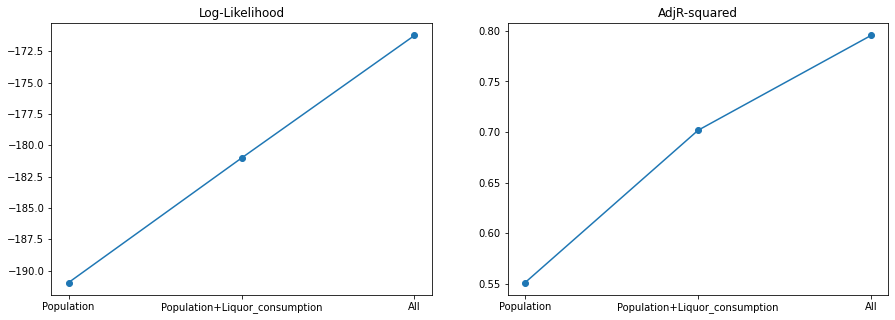

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.set_title('Log-Likelihood')
ax1.plot(*zip(*dictLogLikelihood.items()), '-o')

ax2.set_title('AdjR-squared')
ax2.plot(*zip(*dictAdjR_squared.items()), '-o')
plt.show()

### *we can see the regression is getting better as we add more features*